#Adquisición de datos

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('lean_train.csv')
df2 = pd.read_csv('lean_test.csv')

In [3]:
#df[df['class']=='center']
X = df.drop('class', axis=1).dropna(axis=1)
Y = df['class']

In [4]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=69)

In [5]:
X_test = df2.drop('class', axis=1)
Y_test = df2['class']

In [6]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(675, 132)
(675,)
(120, 132)
(120,)
(124, 132)
(124,)


#Entrenamiento con sklearn

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC

In [8]:
model = SVC(kernel='rbf', probability=True)
n_epochs = 100
train_losses = []
val_losses = []

In [9]:
model.fit(X_train, Y_train)

SVC(probability=True)

In [10]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    model, X, Y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

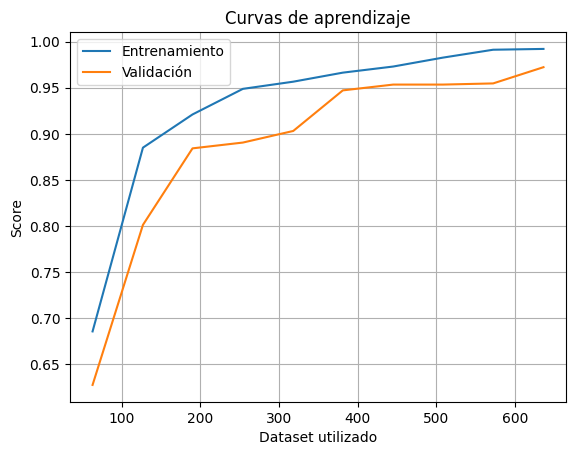

In [11]:
import matplotlib.pyplot as plt

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.title("Curvas de aprendizaje")
plt.plot(train_sizes, train_scores_mean, label="Entrenamiento")
plt.plot(train_sizes, val_scores_mean, label="Validación")
plt.xlabel("Dataset utilizado")
plt.ylabel("Score")

plt.legend()
plt.grid()
plt.show()

In [12]:
y_test_pred = model.predict(X_test)

In [13]:
y_test_pred

array(['right', 'right', 'right', 'right', 'right', 'right', 'right',
       'right', 'right', 'right', 'right', 'left', 'left', 'left', 'left',
       'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left',
       'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left',
       'center', 'center', 'center', 'center', 'center', 'center',
       'center', 'center', 'center', 'center', 'center', 'center',
       'center', 'center', 'center', 'center', 'center', 'center',
       'center', 'right', 'right', 'right', 'right', 'right', 'right',
       'right', 'right', 'right', 'right', 'right', 'right', 'right',
       'right', 'right', 'right', 'right', 'right', 'right', 'right',
       'right', 'right', 'right', 'right', 'right', 'right', 'right',
       'right', 'right', 'right', 'right', 'right', 'right', 'right',
       'center', 'center', 'center', 'center', 'center', 'center', 'left',
       'left', 'left', 'left', 'left', 'left', 'left', 'left', 'left',
       'left', 

In [14]:
Y_test

,class
0,right
1,right
2,right
3,right
4,right
...,...
119,center
120,center
121,center
122,center


#Evaluación y exportado a pickle

In [15]:
precision_score(Y_test, y_test_pred, average='macro')

0.9690058479532165

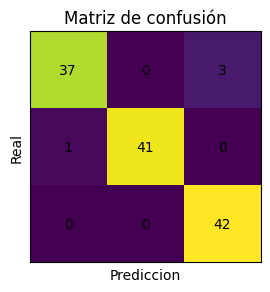

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_test_pred)

plt.figure(figsize=(3,3))
plt.title('Matriz de confusión')
plt.imshow(confusion_matrix)
plt.ylabel('Real')
plt.xlabel('Prediccion')
plt.xticks([])
plt.yticks([])

filas, cols = confusion_matrix.shape
for r in range(filas):
  for c in range(cols):
    plt.text(c, r, str(confusion_matrix[r, c]),
        ha='center', va='center', color='black')
plt.show()

In [54]:
import pickle
with open('lean.pkl', 'wb') as f:
  pickle.dump(model, f)

#Deprecated

Estos usé cuando quería hacer la curva de apredizaje con los loss no con los scores, por lo que usé estimators muy malos en multinomial, por lo que la presición era muy mala

In [10]:
classes = np.unique(Y_train)

for epoch in range(n_epochs):
  model.partial_fit(X_train, Y_train, classes=classes)

  # Training loss
  y_pred = model.predict_proba(X_train)
  train_loss = log_loss(Y_train, y_pred)
  train_losses.append(train_loss)

  # Validation loss
  y_val_pred = model.predict_proba(X_val)
  val_loss = log_loss(Y_val, y_val_pred)
  val_losses.append(val_loss)

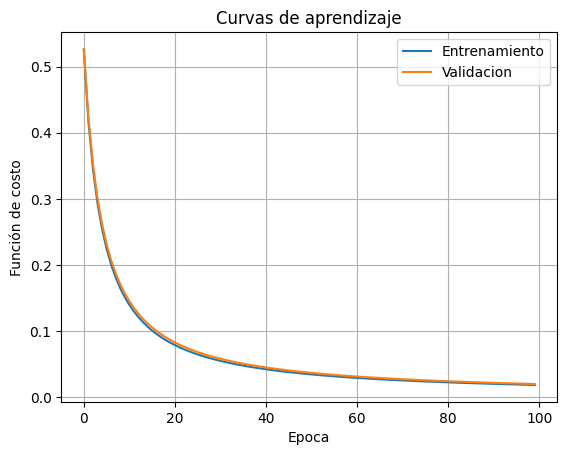

In [11]:
#curvas de aprendizaje
import matplotlib.pyplot as plt

plt.plot(range(n_epochs), train_losses, label='Entrenamiento')
plt.plot(range(n_epochs), val_losses, label='Validacion')
plt.xlabel('Epoca')
plt.ylabel('Función de costo')
plt.title('Curvas de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()